In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/ksah4444/Documents/Group_Project/flights_analysis/data_cleaning/df_cleaned.csv")


In [3]:
df.head(10)

,airline,embarked,destination,Route,stops,journey_year,journey_month,journey_day,weekday,dep_hour,...,departure_period,Arrival_hour,Arrival_min,arrival_period,Arrived_next_day,duration_hours,duration_mins,Duration_in_mins,price,additional_info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,2019,3,24,6,22,...,night,1,10,late night,True,2,50,170,3898,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,2019,5,1,2,5,...,early morning,13,15,After noon,False,7,25,445,7663,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,2019,6,9,6,9,...,morning,4,25,late night,True,19,0,1140,13883,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,2019,5,12,6,18,...,evening,23,30,night,False,5,25,325,6219,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,2019,3,1,4,16,...,After noon,21,35,night,False,4,45,285,13303,No info
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,2019,6,24,0,9,...,morning,11,25,morning,False,2,25,145,3874,No info
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,2019,3,12,1,18,...,evening,10,25,morning,True,15,30,930,11088,In-flight meal not included
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,2019,3,1,4,8,...,early morning,5,5,early morning,True,21,5,1265,22271,No info
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,2019,3,12,1,8,...,early morning,10,25,morning,True,25,30,1530,11088,In-flight meal not included
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,2019,5,27,0,11,...,morning,19,15,evening,False,7,50,470,8626,No info


In [6]:
df.shape

(10462, 21)

In [7]:
df.columns

Index(['airline', 'embarked', 'destination', 'Route', 'stops', 'journey_year',
       'journey_month', 'journey_day', 'weekday', 'dep_hour', 'dep_min',
       'departure_period', 'Arrival_hour', 'Arrival_min', 'arrival_period',
       'Arrived_next_day', 'duration_hours', 'duration_mins',
       'Duration_in_mins', 'price', 'additional_info'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   airline           10462 non-null  object
 1   embarked          10462 non-null  object
 2   destination       10462 non-null  object
 3   Route             10462 non-null  object
 4   stops             10462 non-null  object
 5   journey_year      10462 non-null  int64 
 6   journey_month     10462 non-null  int64 
 7   journey_day       10462 non-null  int64 
 8   weekday           10462 non-null  int64 
 9   dep_hour          10462 non-null  int64 
 10  dep_min           10462 non-null  int64 
 11  departure_period  10462 non-null  object
 12  Arrival_hour      10462 non-null  int64 
 13  Arrival_min       10462 non-null  int64 
 14  arrival_period    10462 non-null  object
 15  Arrived_next_day  10462 non-null  bool  
 16  duration_hours    10462 non-null  int64 
 17  duration_min

# Data Viz

In [9]:
# Getting a look at the airlines, to see if some airline is over repsented which could lead to bias
df.airline.value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: airline, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


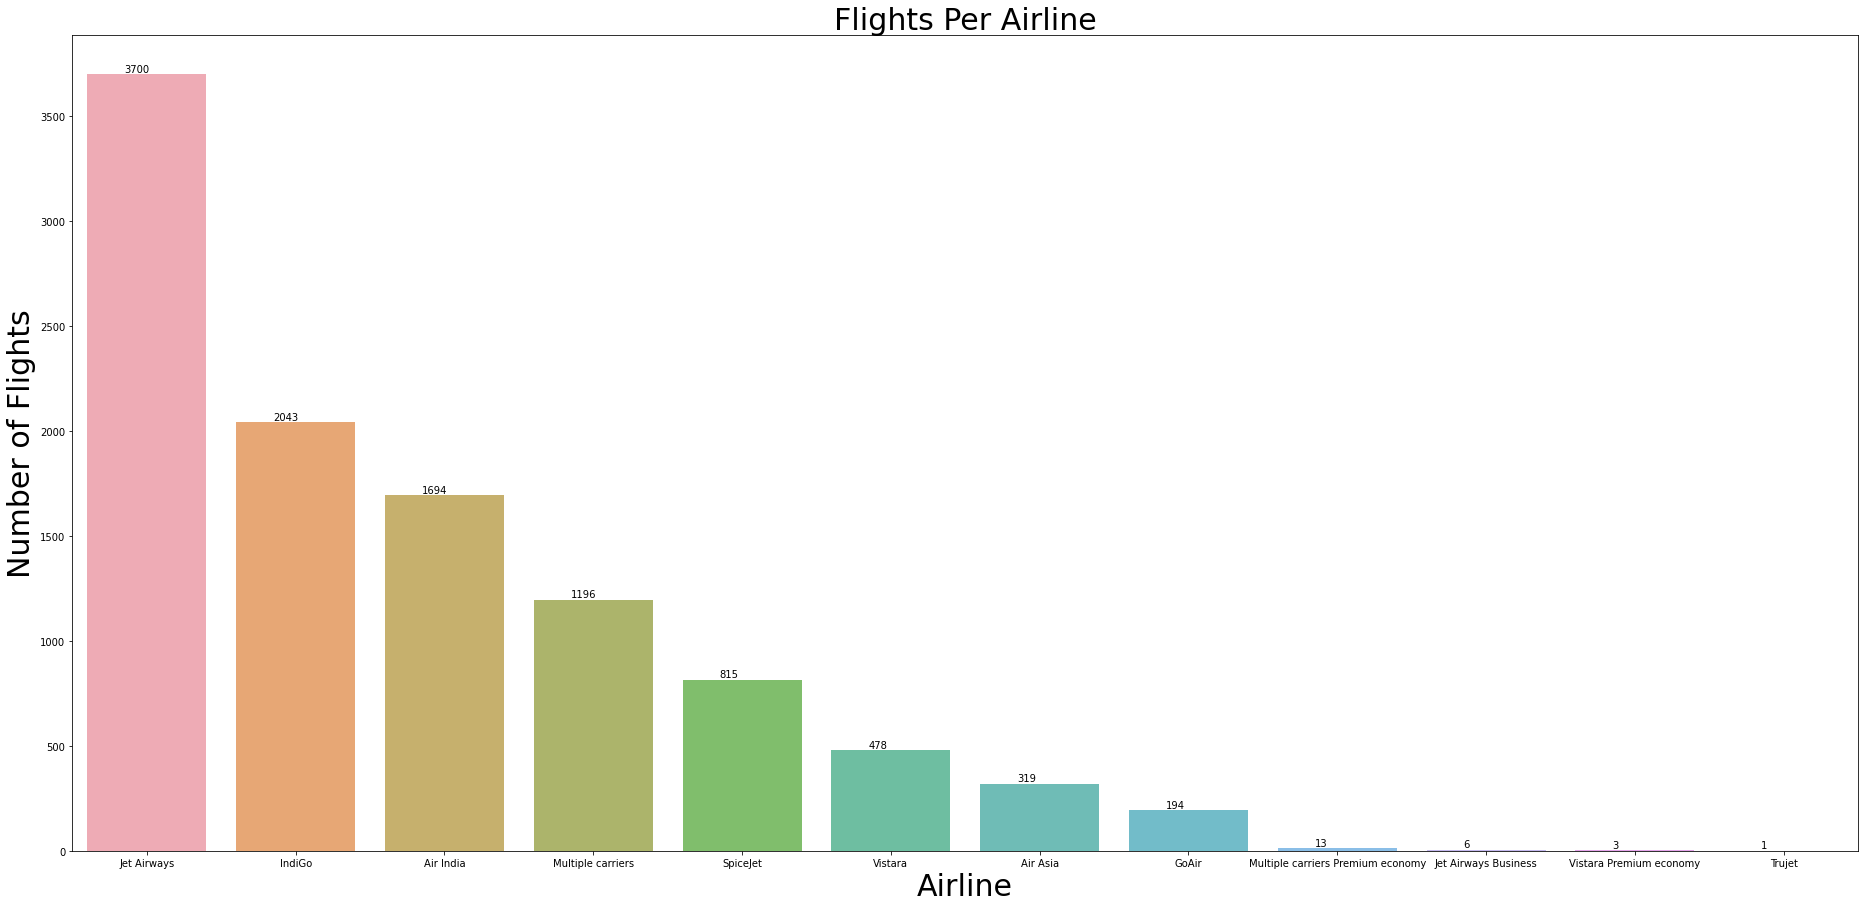

In [29]:
# Let's see if there is any bias in the number of flights per airline
Number_Airline  = df['airline'].value_counts()
Number_Airline = Number_Airline[:12,]
plt.figure(figsize=(32,15))
plt_Number_Airline= sns.barplot(Number_Airline.index, Number_Airline.values, alpha=0.8)
plt.title('Flights Per Airline', fontsize=30)
plt.ylabel('Number of Flights', fontsize=30)
plt.xlabel('Airline', fontsize=30)
plt.xticks(fontsize= 10) 
for p in plt_Number_Airline.patches:
    plt_Number_Airline.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')
plt.show()

Text(0.5, 0, 'Airline')

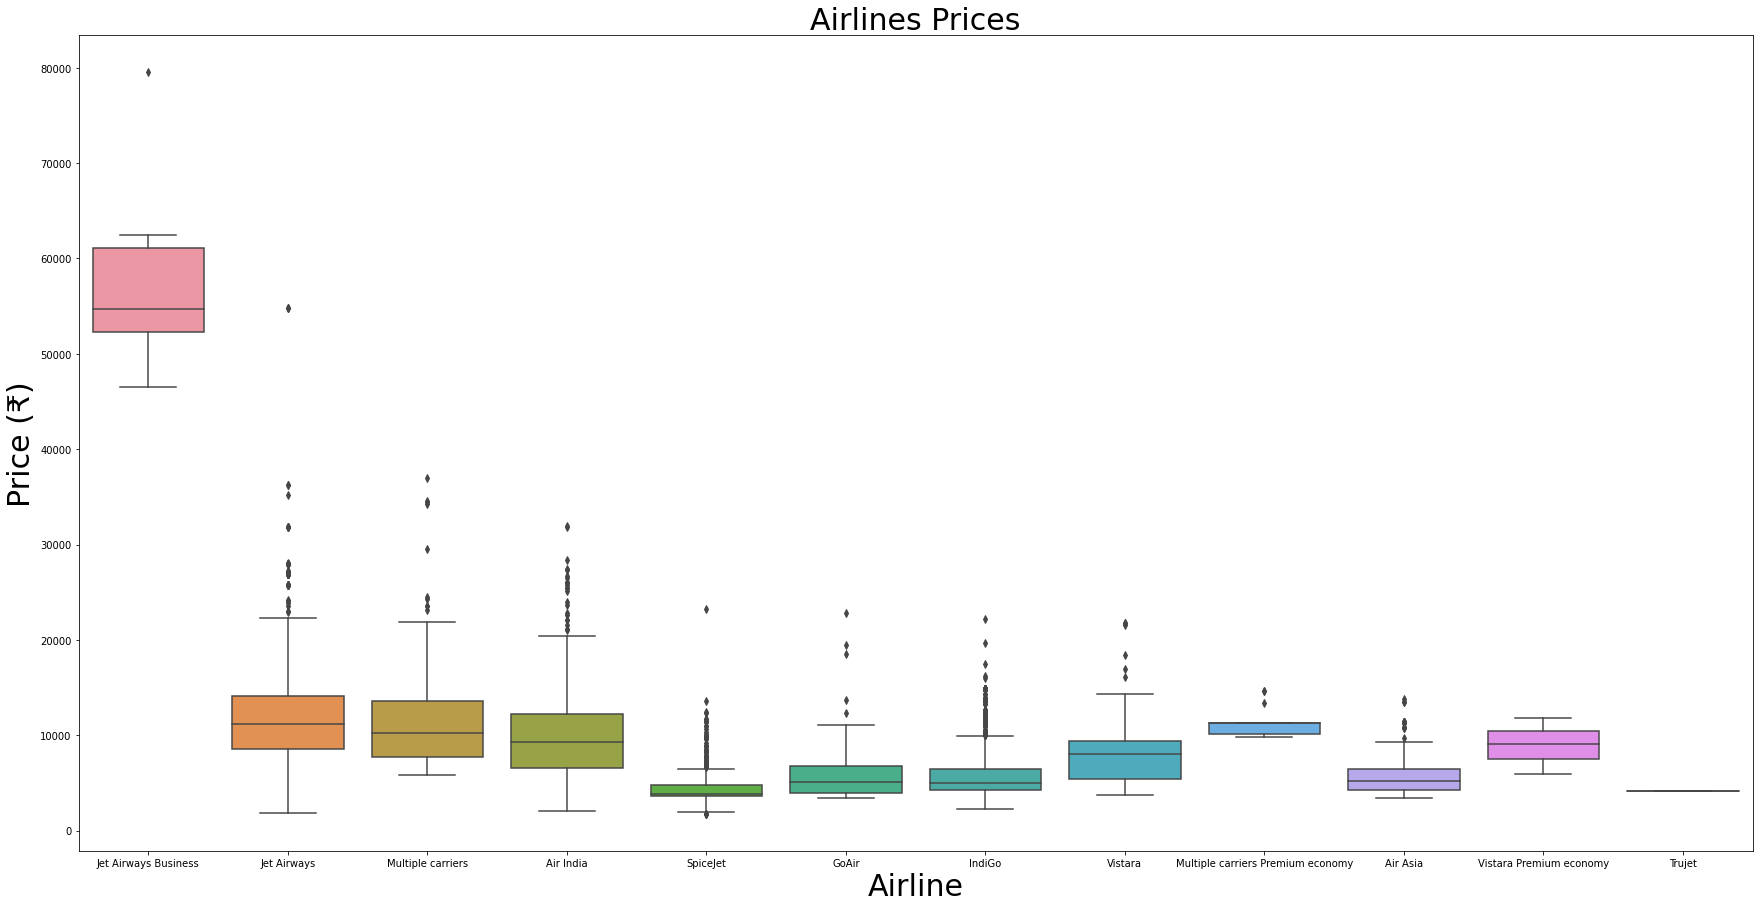

In [20]:
# Lets get a general look at the airlines, and thier prices
plt.figure(figsize=(30,15))
sns.boxplot(x='airline',y='price',data=df.sort_values('price',ascending=False))
plt.title('Airlines Prices', fontsize=30)
plt.ylabel('Price (₹)', fontsize=30)
plt.xlabel('Airline', fontsize=30)

In [38]:
# Let's see if certain airlines or classes are more expensive than others
df.groupby('airline')['price'].mean().sort_values(ascending=False)

airline
Jet Airways Business                 58359.666667
Jet Airways                          11600.021081
Multiple carriers Premium economy    11419.846154
Multiple carriers                    10903.678094
Air India                             9557.608028
Vistara Premium economy               8963.333333
Vistara                               7802.355649
GoAir                                 5862.056701
IndiGo                                5669.469897
Air Asia                              5591.260188
SpiceJet                              4336.841718
Trujet                                4141.000000
Name: price, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


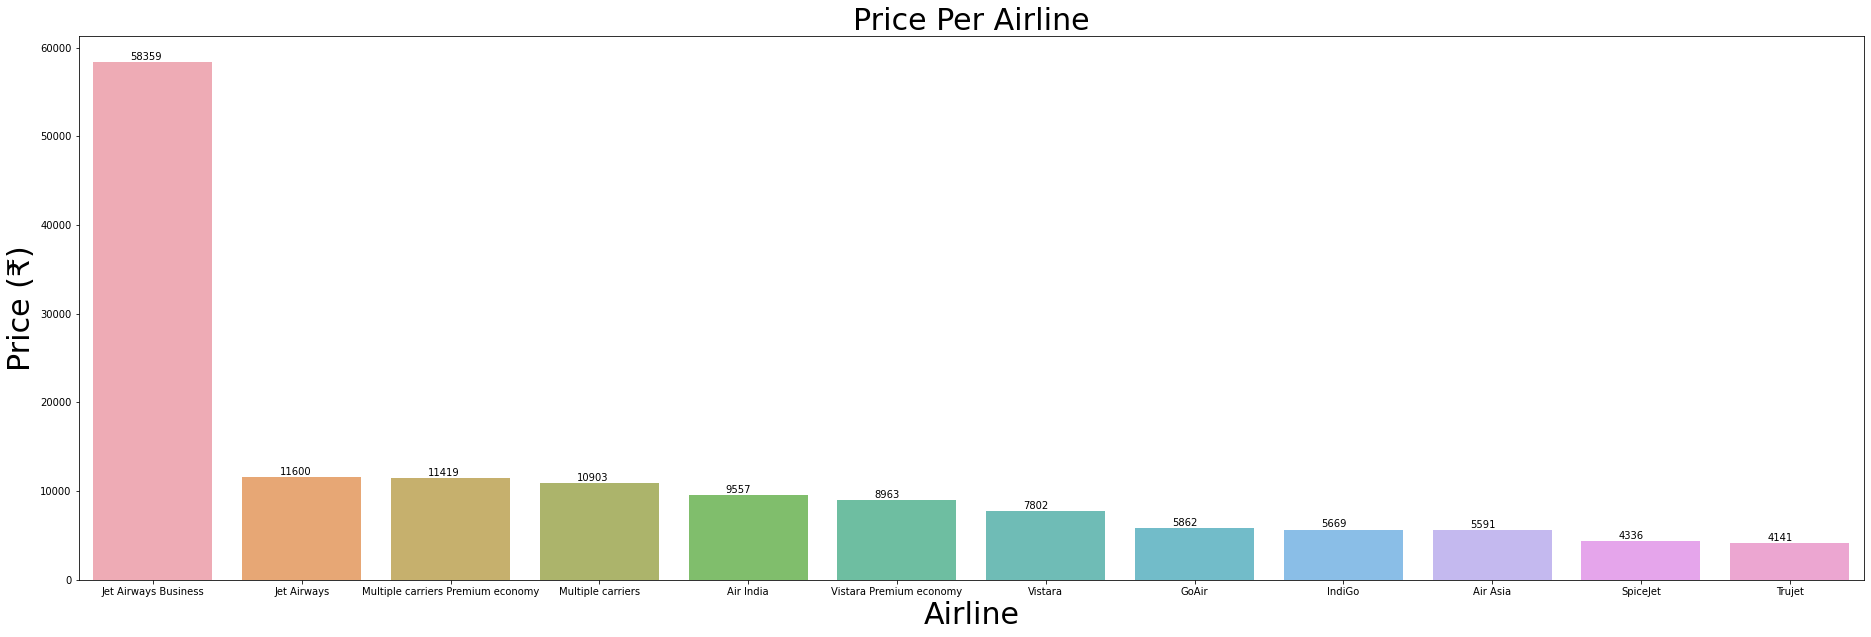

In [33]:
# Let's see how the prices of different airlines/classes look like
Price_Airline  = df.groupby('airline')['price'].mean().sort_values(ascending=False)
Price_Airline = Price_Airline[:12,]
plt.figure(figsize=(32,10))
plt_Price_Airline = sns.barplot(Price_Airline.index, Price_Airline, alpha=0.8)
plt.title('Price Per Airline', fontsize=30)
plt.ylabel('Price (₹)', fontsize=30)
plt.xlabel('Airline', fontsize=30)
plt.xticks(fontsize= 10) 
for p in plt_Price_Airline.patches:
    plt_Price_Airline.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


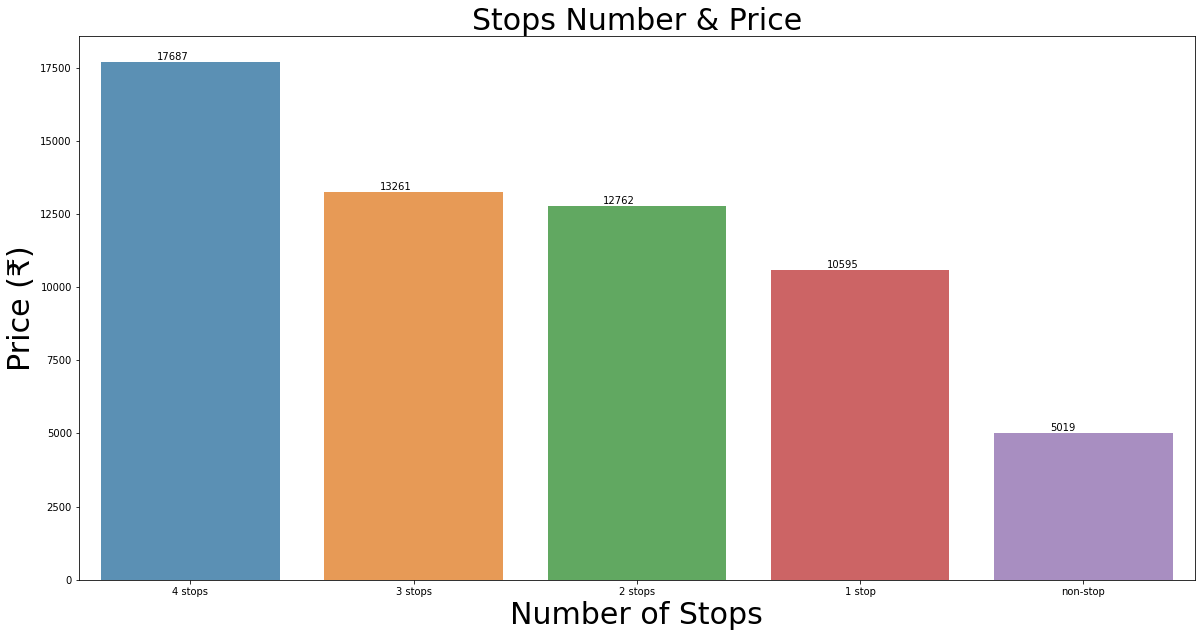

In [32]:
# What about the number of stops?
Price_Stops  = df.groupby('stops')['price'].mean().sort_values(ascending=False)
Price_Stops = Price_Stops[:12,]
plt.figure(figsize=(20,10))
plt_Price_Stops = sns.barplot(Price_Stops.index, Price_Stops, alpha=0.8)
plt.title('Stops Number & Price', fontsize=30)
plt.ylabel('Price (₹)', fontsize=30)
plt.xlabel('Number of Stops', fontsize=30)
plt.xticks(fontsize= 10) 
for p in plt_Price_Stops.patches:
    plt_Price_Stops.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')
plt.show()


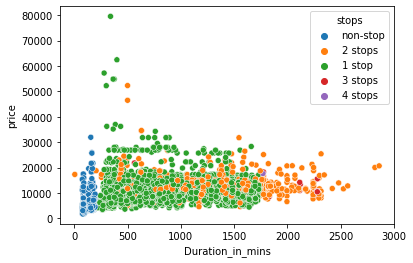

In [51]:
# Obviously, let's see how the duration is related to the price
g =sns.scatterplot(x = df['Duration_in_mins'],y = df['price'],hue="stops",data=df);

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


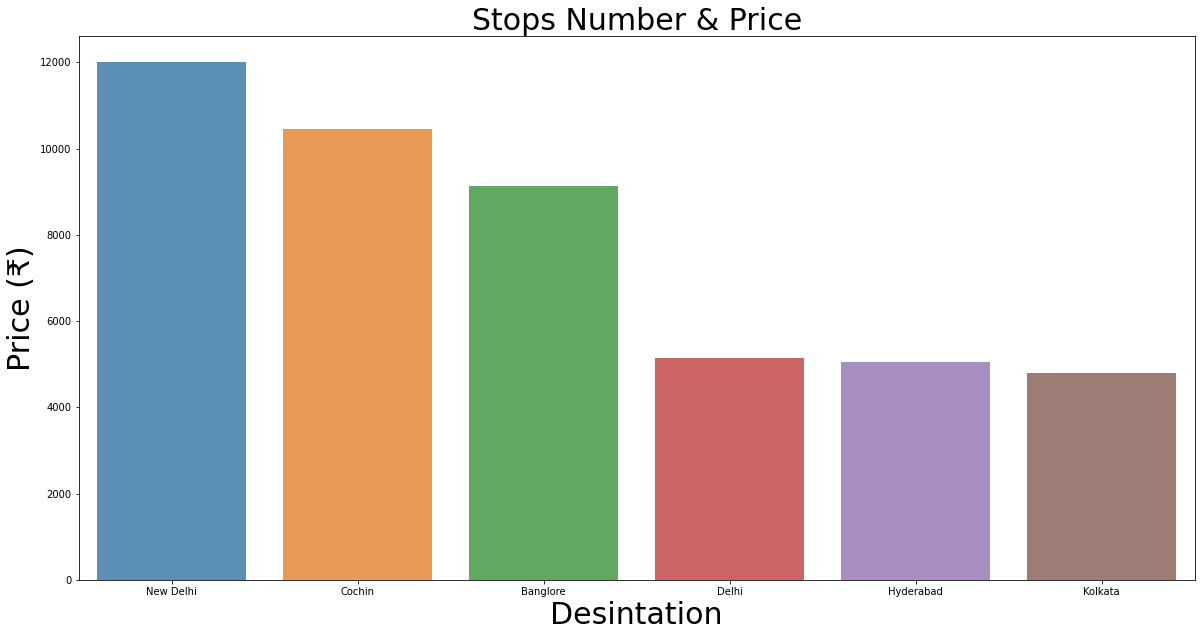

In [52]:
# What abut the destination?
Price_Destination = df.groupby('destination')['price'].mean().sort_values(ascending=False)
Price_Destination = Price_Destination[:12,]
plt.figure(figsize=(20,10))
sns.barplot(Price_Destination.index, Price_Destination, alpha=0.8)
plt.title('Desinatio & Price', fontsize=30)
plt.ylabel('Price (₹)', fontsize=30)
plt.xlabel('Desintation', fontsize=30)
plt.xticks(fontsize= 10) 
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


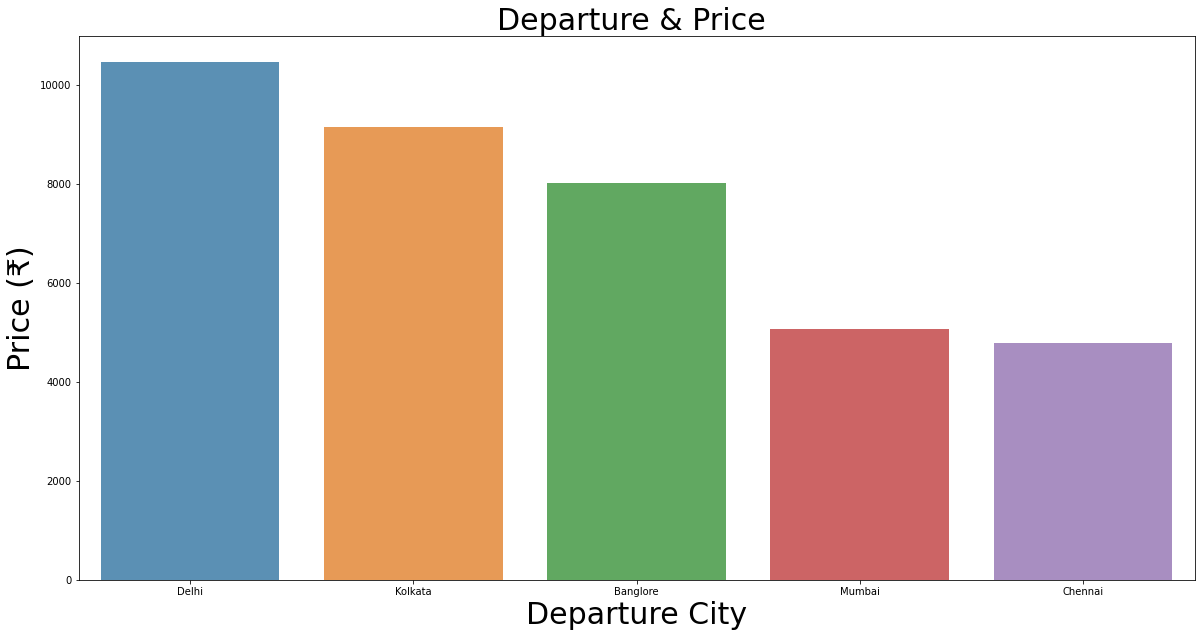

In [54]:
# Maybe, the departure city??
Price_Embarked = df.groupby('embarked')['price'].mean().sort_values(ascending=False)
Price_Embarked = Price_Embarked[:12,]
plt.figure(figsize=(20,10))
sns.barplot(Price_Embarked .index, Price_Embarked, alpha=0.8)
plt.title('Departure & Price ', fontsize=30)
plt.ylabel('Price (₹)', fontsize=30)
plt.xlabel('Departure City', fontsize=30)
plt.xticks(fontsize= 10) 
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


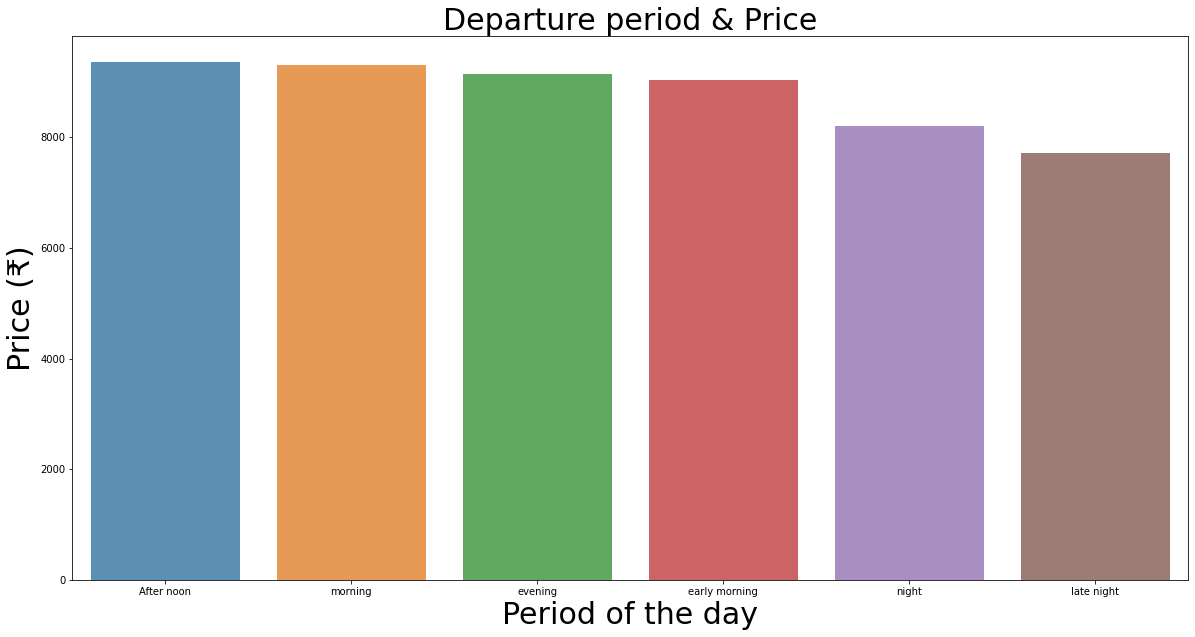

In [55]:
# What abut the time of the departure?
Price_Departure_Period = df.groupby('departure_period')['price'].mean().sort_values(ascending=False)
Price_Departure_Period = Price_Departure_Period[:12,]
plt.figure(figsize=(20,10))
sns.barplot(Price_Departure_Period.index, Price_Departure_Period, alpha=0.8)
plt.title('Departure period & Price', fontsize=30)
plt.ylabel('Price (₹)', fontsize=30)
plt.xlabel('Period of the day', fontsize=30)
plt.xticks(fontsize= 10) 
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


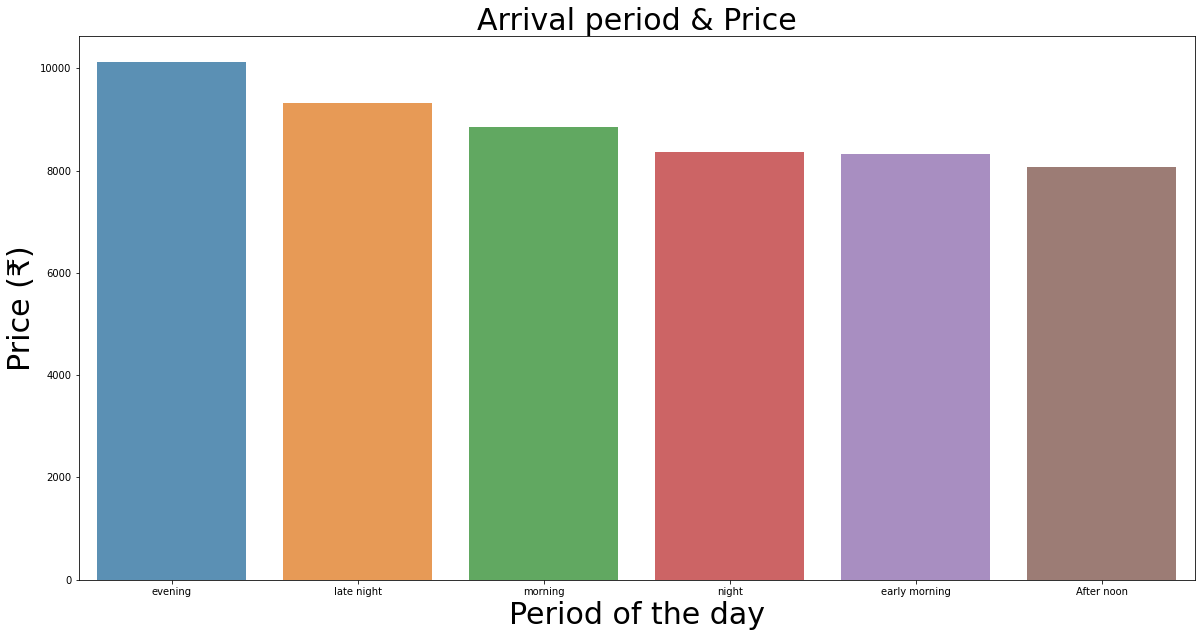

In [56]:
# Maybe, arrival period?
Price_Arrival_Period = df.groupby('arrival_period')['price'].mean().sort_values(ascending=False)
Price_Arrival_Period = Price_Arrival_Period[:12,]
plt.figure(figsize=(20,10))
sns.barplot(Price_Arrival_Period.index, Price_Arrival_Period, alpha=0.8)
plt.title('Arrival period & Price', fontsize=30)
plt.ylabel('Price (₹)', fontsize=30)
plt.xlabel('Period of the day', fontsize=30)
plt.xticks(fontsize= 10) 
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


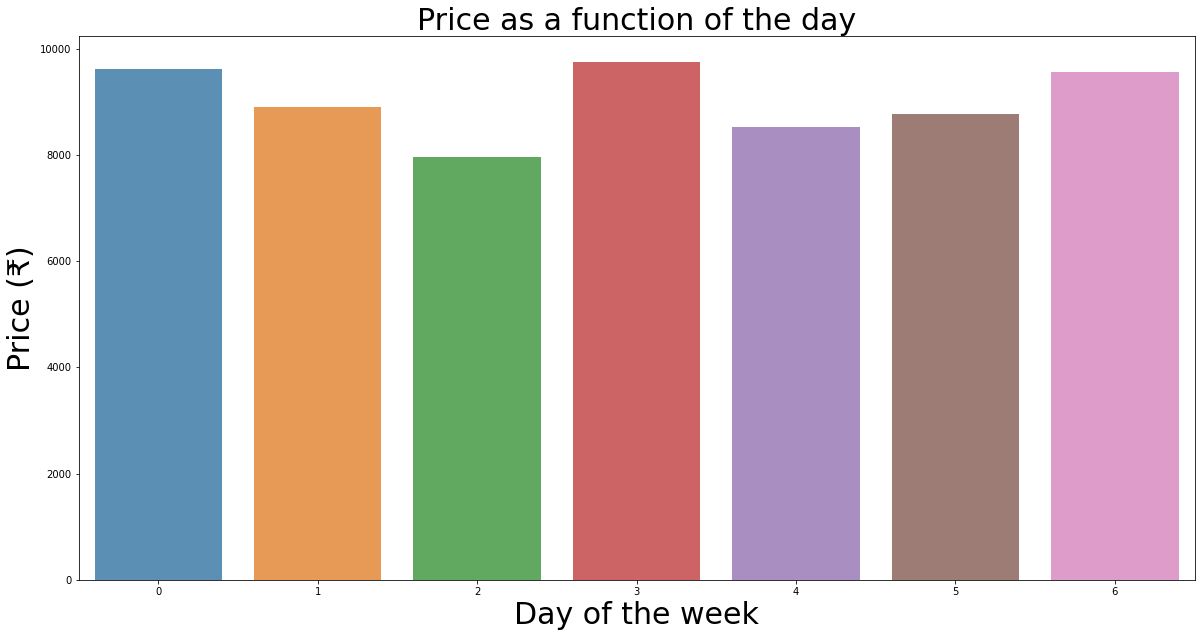

In [62]:
# What about the weekdays, and weekend?
Price_WeekDay = df.groupby('weekday')['price'].mean().sort_values(ascending=False)
Price_WeekDay = Price_WeekDay[:12,]
plt.figure(figsize=(20,10))
sns.barplot(Price_WeekDay.index, Price_WeekDay, alpha=0.8)
plt.title('Price as a function of the day', fontsize=30)
plt.ylabel('Price (₹)', fontsize=30)
plt.xlabel('Day of the week', fontsize=30)
plt.xticks(fontsize= 10) 
plt.show()

In [ ]:
### India's biggest holidays in 2019:
# Holi = Thursday, 21 March
# Maha Shivaratri = Monday, 4 March

In [64]:
df.head(1)

,airline,embarked,destination,Route,stops,journey_year,journey_month,journey_day,weekday,dep_hour,...,departure_period,Arrival_hour,Arrival_min,arrival_period,Arrived_next_day,duration_hours,duration_mins,Duration_in_mins,price,additional_info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,2019,3,24,6,22,...,night,1,10,late night,True,2,50,170,3898,No info


In [8]:
df.	journey_month.value_counts()

5    3395
6    3311
3    2678
4    1078
Name: journey_month, dtype: int64

In [10]:
df.groupby(['journey_month','weekday'])['price'].mean()

journey_month  weekday
3              0           8927.858974
               1          11599.851064
               2          11172.448326
               3           7983.269417
               4          13954.444444
               5          10411.826087
               6          10457.964687
4              0           6841.530435
               1           6463.984000
               2           4655.920792
               3           5345.940299
               4           5125.031746
               5           5002.417526
               6           5574.000000
5              0           8843.546154
               1           9738.126556
               2           8696.315089
               3           9600.004292
               4           7795.789894
               5           9721.154321
               6           8523.447876
6              0           8663.402439
               1           4708.371429
               2           9161.322981
               3           9111.597105
  

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


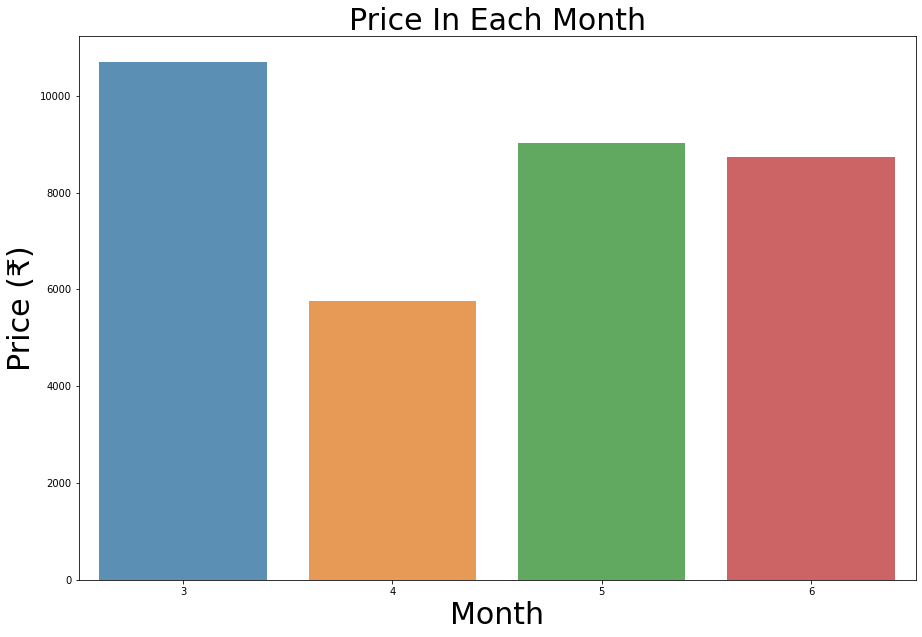

In [13]:
# What about the journey months?
Price_Month = df.groupby('journey_month')['price'].mean().sort_values(ascending=False)
Price_Month = Price_Month[:12,]
plt.figure(figsize=(15,10))
sns.barplot(Price_Month.index, Price_Month, alpha=0.8)
plt.title('Price In Each Month', fontsize=30)
plt.ylabel('Price (₹)', fontsize=30)
plt.xlabel('Month', fontsize=30)
plt.xticks(fontsize= 10) 
plt.show()

In [6]:
df_oil = pd.read_csv("/Users/ksah4444/Documents/Group_Project/Just_in_Case/brent-daily.csv")
df_oil.tail()

,Date,Price
8444,2020-08-24,44.43
8445,2020-08-25,46.01
8446,2020-08-26,45.79
8447,2020-08-27,44.84
8448,2020-08-28,45.22
